# Laboratorio 1

#### René Ronaldo Godoy Mejía
#### Carnet 23005126

## Problema 1

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color según los siguientes puntos:
- Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
- Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
- Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
- Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde.
- Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.
- Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y rojo.

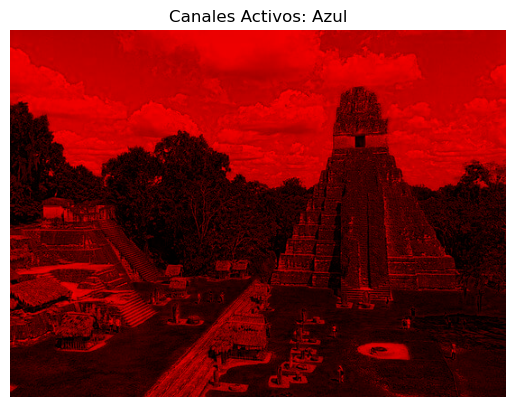

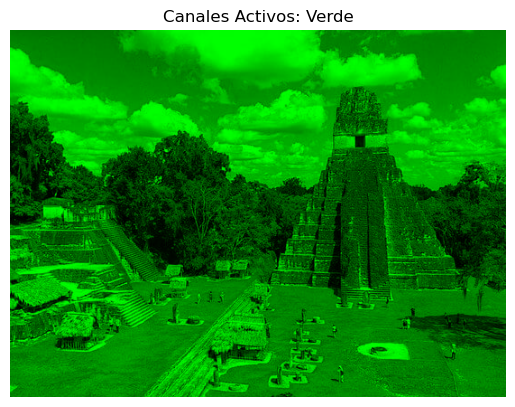

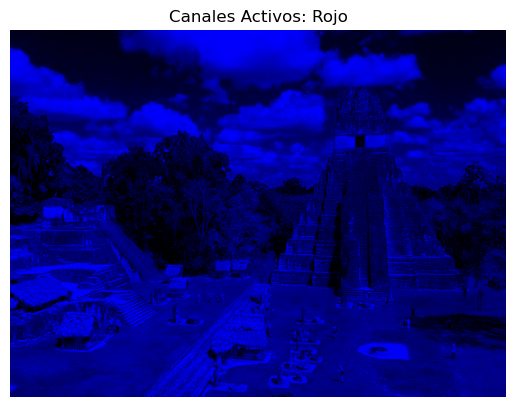

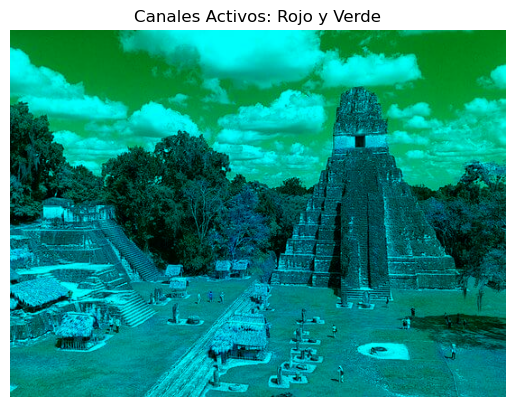

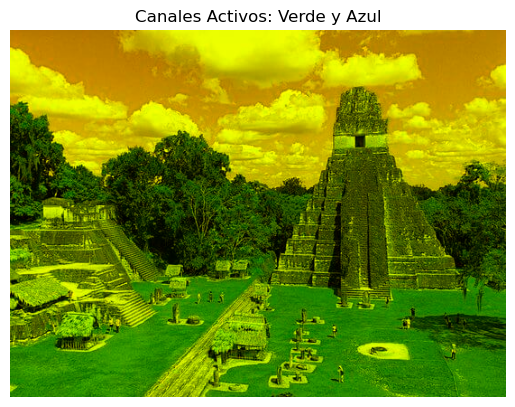

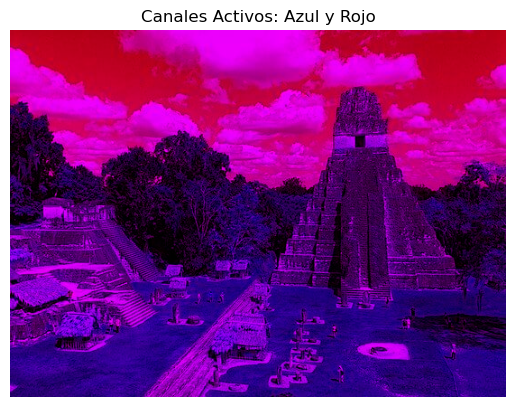

In [11]:
import cv2 #importamos opencv
import numpy as np
import matplotlib.pyplot as plt

# Carga de la imagien
img = cv2.imread('Problema1.jpg') #cargamos imagen, recordar que carga en BGR


# covertimos imagen a formato RGB
def mostrar_imagen(img, titulo=""):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # covertimos imagen a formato RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(titulo)
    plt.show()

# Activamos los canales de los colores
def activar_canales(img, color):
    img_salida = np.zeros_like(img)  # Crear una copia de la imagen con ceros
    
    if color == 1:
        img_salida[:, :, 0] = img[:, :, 0]  # Activar solo el canal azul (B)
    elif color == 2:
        img_salida[:, :, 1] = img[:, :, 1]  # Activar solo el canal verde (G)
    elif color == 3:
        img_salida[:, :, 2] = img[:, :, 2]  # Activar solo el canal rojo (R)
    elif color == 10:
        img_salida[:, :, 1] = img[:, :, 1]  # Activar canal verde (G)
        img_salida[:, :, 2] = img[:, :, 2]  # Activar canal rojo (R)
    elif color == 20:
        img_salida[:, :, 0] = img[:, :, 0]  # Activar canal azul (B)
        img_salida[:, :, 1] = img[:, :, 1]  # Activar canal verde (G)
    elif color == 30:
        img_salida[:, :, 0] = img[:, :, 0]  # Activar canal azul (B)
        img_salida[:, :, 2] = img[:, :, 2]  # Activar canal rojo (R)

    return img_salida


# realizamos las pruebas y la visualización de los canales
colores = [1, 2, 3, 10, 20, 30]
nombres_colores = ["Azul", "Verde", "Rojo", "Rojo y Verde", "Verde y Azul", "Azul y Rojo"]

for color, nombre in zip(colores, nombres_colores):
    img_color = activar_canales(img, color)
    mostrar_imagen(img_color, f'Canales Activos: {nombre}')


## Problema 2

En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises (imagen1,
imagen2, perro) estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una
función que dadas las 3 imágenes se construya la imagen original a color.

In [15]:
#importé las librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
# mostré las imagenes
def mostrar_imagen(img, titulo=""):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(titulo)
    plt.show()

In [19]:
# combinación de imagenes para pasarlas a color
def combinar_imagenes(carpeta, nombre_base):
    # Construir las rutas de las imágenes en escala de grises
    imagen_azul = os.path.join(carpeta, f'{nombre_base}_salida_gray_azul.jpg')
    imagen_rojo = os.path.join(carpeta, f'{nombre_base}_salida_gray_rojo.jpg')
    imagen_verde = os.path.join(carpeta, f'{nombre_base}_salida_gray_verde.jpg')
    
    # leí las imágenes en escala de grises
    img_azul = cv2.imread(imagen_azul, cv2.IMREAD_GRAYSCALE)
    img_rojo = cv2.imread(imagen_rojo, cv2.IMREAD_GRAYSCALE)
    img_verde = cv2.imread(imagen_verde, cv2.IMREAD_GRAYSCALE)
    
    # verificación de las dimesniones de cada imagen
    if img_azul.shape != img_rojo.shape or img_azul.shape != img_verde.shape:
        raise ValueError("Todas las imágenes deben tener las mismas dimensiones")

    # Creé una imagen en color combinando las imágenes en escala de grises
    img_color = np.zeros((img_azul.shape[0], img_azul.shape[1], 3), dtype=np.uint8)
    img_color[:, :, 0] = img_azul  # Canal azul
    img_color[:, :, 1] = img_verde  # Canal verde
    img_color[:, :, 2] = img_rojo  # Canal rojo

    return img_color

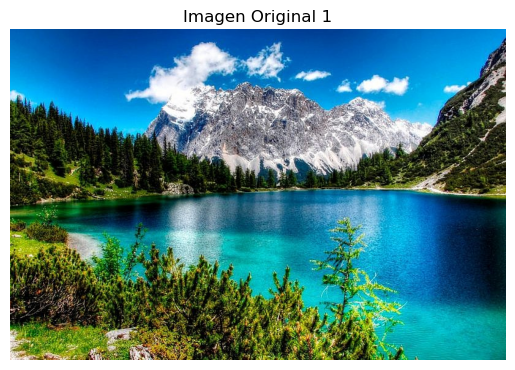

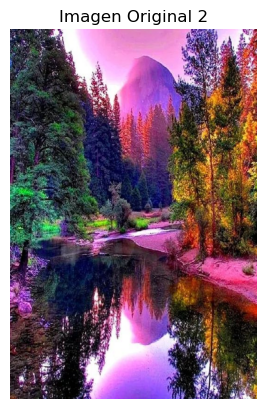

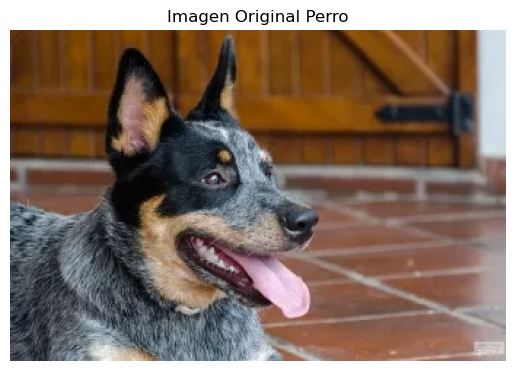

In [20]:
# cargué y combiné las imágenes para cada carpeta
img_color_1 = combinar_imagenes('imagen1', 'imagen1')
img_color_2 = combinar_imagenes('imagen2', 'imagen2')
img_color_perro = combinar_imagenes('perro', 'perro')

# Muestra de las imagenes originales a color
mostrar_imagen(img_color_1, 'Imagen Original 1')
mostrar_imagen(img_color_2, 'Imagen Original 2')
mostrar_imagen(img_color_perro, 'Imagen Original Perro')

## Problema 3

Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir
una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.


In [26]:
### Cargamos Librerias
import cv2 #importamos opencv
import numpy as np
import matplotlib.pyplot as plt

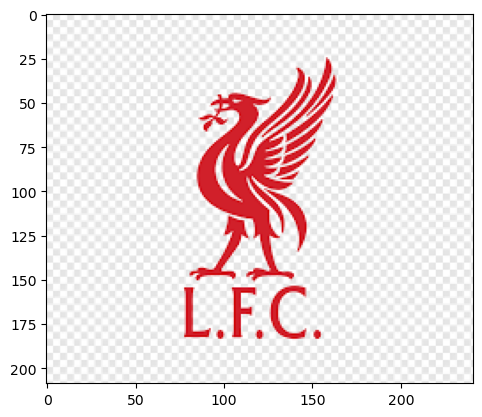

In [28]:
### Cargamos nuestra imagen de prueba
img = cv2.imread("Problema3.jpg") # cargamos imagen, recordar que carga en BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convertimos imagen a formato RGB

### Visualizamos imagen cargada
plt.imshow(img)
plt.show()

In [29]:
# Definimos la función para crear la escala de grises en 3D
def escala_grises_3D(img, nombre_base):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    # Crear lienzos para las imágenes en escala de grises
    img_gris_azul = np.zeros((alto, ancho), dtype=np.uint8)
    img_gris_verde = np.zeros((alto, ancho), dtype=np.uint8)
    img_gris_rojo = np.zeros((alto, ancho), dtype=np.uint8)
    
    # Llenar las imágenes en escala de grises con los valores de los canales correspondientes
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]
            img_gris_azul[i, j] = pixel[2]  # Canal azul
            img_gris_verde[i, j] = pixel[1]  # Canal verde
            img_gris_rojo[i, j] = pixel[0]  # Canal rojo
    
    # Guardar las imágenes resultantes
    cv2.imwrite(f"{nombre_base}_gray_azul.jpg", img_gris_azul)
    cv2.imwrite(f"{nombre_base}_gray_verde.jpg", img_gris_verde)
    cv2.imwrite(f"{nombre_base}_gray_rojo.jpg", img_gris_rojo)
    
    # Visualizamos las imágenes resultantes
    plt.imshow(img_gris_azul, cmap='gray')
    plt.title('Escala de Grises - Azul')
    plt.show()
    
    plt.imshow(img_gris_verde, cmap='gray')
    plt.title('Escala de Grises - Verde')
    plt.show()
    
    plt.imshow(img_gris_rojo, cmap='gray')
    plt.title('Escala de Grises - Rojo')
    plt.show()

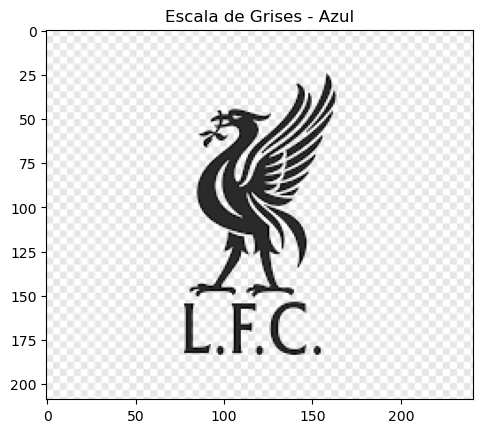

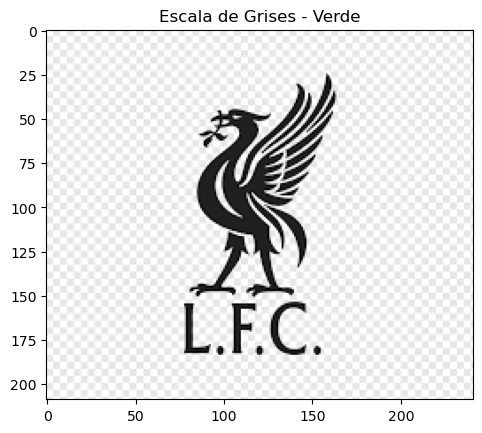

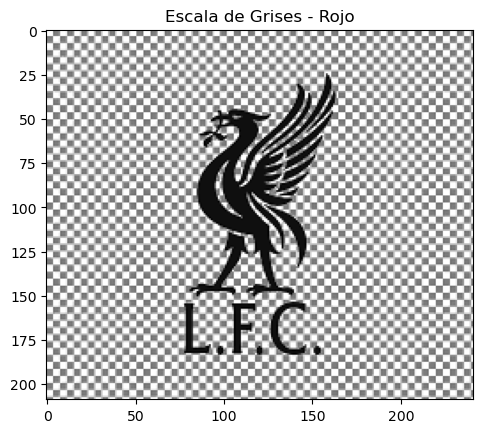

In [30]:
# Aplicamos la función a la imagen de prueba
escala_grises_3D(img, 'Problema3')

## Problema 4

Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media
de la distribución.

In [33]:
### Cargamos Librerias
import cv2 #importamos opencv
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Cargamos nuestra imagen
img = cv2.imread("Problema4.jpg") # cargamos imagen, recordar que carga en BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convertimos imagen a formato RGB


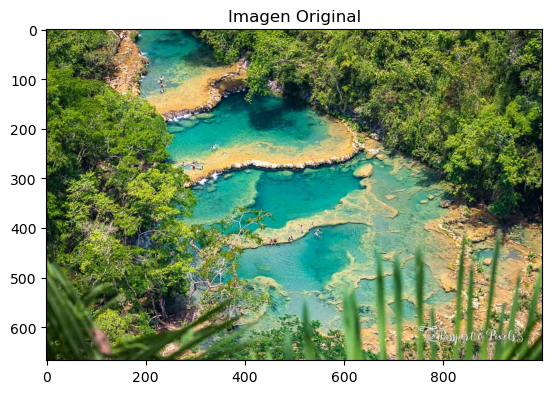

In [35]:
### Visualizamos imagen cargada
plt.imshow(img)
plt.title("Imagen Original")
plt.show()


In [38]:
# Definición de la función para mostrar histogramas con la media
def mostrar_histogramas(img):
    # Separé los canales de color
    rojo = img[:,:,0]
    verde = img[:,:,1]
    azul = img[:,:,2]

    # Calculé el histograma de cada canal
    hist_rojo = np.histogram(rojo, bins=256, range=(0, 256))[0]
    hist_verde = np.histogram(verde, bins=256, range=(0, 256))[0]
    hist_azul = np.histogram(azul, bins=256, range=(0, 256))[0]

    # Calculo de la escala de grises utilizando el promedio aritmético
    gris = (rojo + verde + azul) // 3
    hist_gris = np.histogram(gris, bins=256, range=(0, 256))[0]

    # Calculo de la media de cada distribución
    media_rojo = np.mean(rojo)
    media_verde = np.mean(verde)
    media_azul = np.mean(azul)
    media_gris = np.mean(gris)

    # Ploteamiento de los histogramas con la línea de media
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    axs[0, 0].plot(hist_rojo, color='red')
    axs[0, 0].axvline(media_rojo, color='k', linestyle='dashed', linewidth=1)
    axs[0, 0].set_title("Histograma - Rojo")

    axs[0, 1].plot(hist_verde, color='green')
    axs[0, 1].axvline(media_verde, color='k', linestyle='dashed', linewidth=1)
    axs[0, 1].set_title("Histograma - Verde")

    axs[1, 0].plot(hist_azul, color='blue')
    axs[1, 0].axvline(media_azul, color='k', linestyle='dashed', linewidth=1)
    axs[1, 0].set_title("Histograma - Azul")

    axs[1, 1].plot(hist_gris, color='gray')
    axs[1, 1].axvline(media_gris, color='k', linestyle='dashed', linewidth=1)
    axs[1, 1].set_title("Histograma - Escala de Grises")

    plt.tight_layout()
    plt.show()

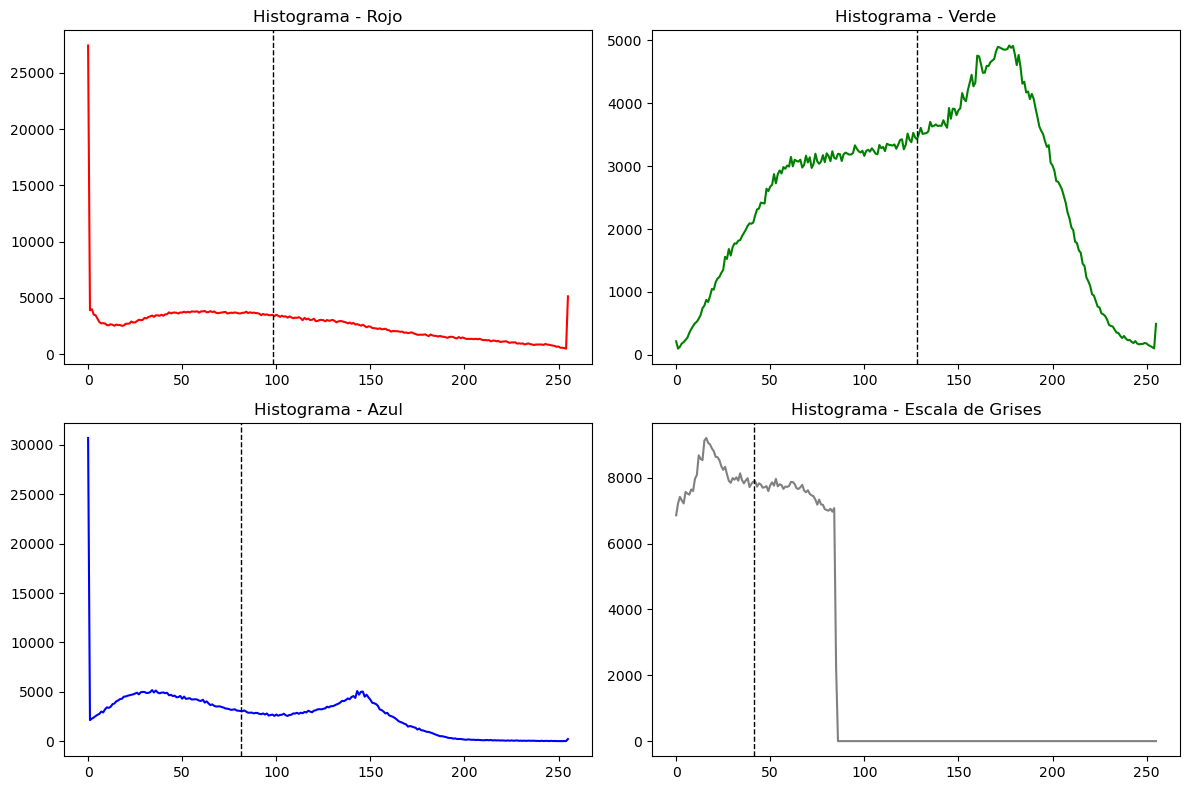

In [39]:
# Aplicamos la función a la imagen cargada
mostrar_histogramas(img)

## Problema 5

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
función que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solución única).

### Enfoque de Escala de Grises Ponderado


La escala de grises ponderada es una técnica de procesamiento de imágenes que convierte una imagen en color (RGB) a una imagen en escala de grises. A diferencia de la conversión directa, donde todos los canales de color (rojo, verde y azul) se promedian uniformemente, la escala de grises ponderada utiliza una combinación ponderada de los canales para reflejar mejor cómo los humanos perciben la luminosidad.

#### Fórmula de Conversión

La fórmula para convertir un píxel de una imagen en color a escala de grises ponderada es:

 - [i, j] = (0.3 * red + 0.59 * green + 0.11 * blue)

In [46]:
### Cargamos Librerias
import cv2 #importamos opencv
import numpy as np
import matplotlib.pyplot as plt

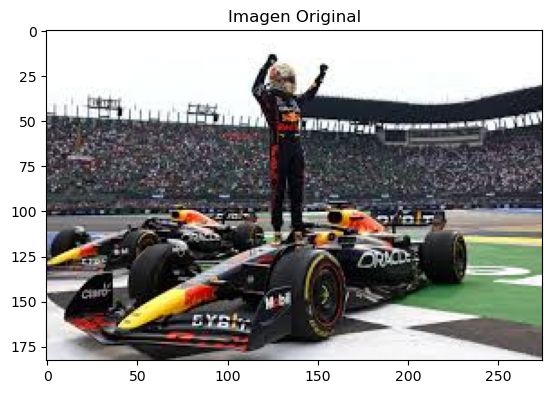

In [45]:
#### Cargamos nuestra imagen
img = cv2.imread("Problema5.jpg") #cargamos imagen, recordar que carga en BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # covertimos imagen a formato RGB

### Visualizamos imagen cargada
plt.imshow(img)
plt.title("Imagen Original")
plt.show()

In [47]:
# Obtenemos las dimensiones de la imagen
alto = img.shape[0]
ancho = img.shape[1]

In [48]:
# Creamos una imagen de salida para la escala de grises ponderada
img_gris_ponderado = np.zeros((alto, ancho), dtype=np.uint8)

# Aplicamos la fórmula de la escala de grises ponderada
for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i, j]
        
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]

        img_gris_ponderado[i, j] = 0.3 * red + 0.59 * green + 0.11 * blue ##esta formula esta en la diapositiva de clase y es para la escala de grises ponderado

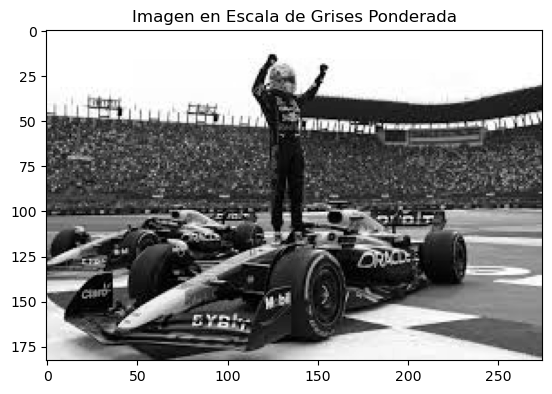

In [49]:
# Guardamos y mostramos la imagen en escala de grises ponderada
cv2.imwrite("Problema5_gris_ponderado.jpg", img_gris_ponderado)
gris_ponderado = cv2.imread("Problema5_gris_ponderado.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(gris_ponderado, cmap='gray')
plt.title("Imagen en Escala de Grises Ponderada")
plt.show()

## Problema 6

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajó los demás ejercicios.

### Espacio de color HSV

El modelo de color HSV es una transformación no lineal del modelo RGB en coordenadas cilíndricas de manera que cada color viene definido por las siguientes dimensiones:

- Tinte o matiz: Ángulo que representa el matiz, normalmente definido entre 0o y 360o.
- Saturación: Nivel saturación del color, dado entre 0 y 1, 0 representa sin saturación alguna (blanco), hasta 1 que sería el matiz en toda su intensidad. Es común también darlo en percentiles 0%-100%.
- Brillo: Nivel del brillo entre 0 y 1. 0 es negro; 1, blanco. Al igual que la saturación puede darse en porcientos entre 0% y 100%. De esta forma el 50% indica el nivel medio o normal del brillo del color.

#### Mapeo de Colores al Espacio HSV


1. Convertir RGB a HSV: 

    - Normalizar: Primero, los valores RGB se normalizan en el rango de 0 a 1.
    - Calcular Valor (V): Se toma el máximo de los valores R, G y B.
    - Calcular Saturación (S): Se calcula la diferencia entre el valor máximo y el mínimo y se normaliza.
    - Calcular Tono (H): Basado en la diferencia entre los componentes de color, se calcula el ángulo correspondiente en el círculo de color.

2. Aplicaciones del Espacio HSV:

    - Edición de Imágenes: Facilita la manipulación de colores y el ajuste de brillo y saturación de manera más intuitiva.
    - Detección de Colores: Permite una separación más fácil de colores específicos en el análisis de imágenes.